In [1]:
!pip install stable-baselines[mpi]==2.10.0
import gym
import numpy as np
import time
import os
from utils import *
import matplotlib.pyplot as plt

from stable_baselines.common.env_checker import check_env
from stable_baselines.deepq.policies import FeedForwardPolicy
from stable_baselines import DQN, PPO2, A2C, ACKTR
from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec, NormalActionNoise
%matplotlib inline

/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cmb/anaconda3/envs/thesis/lib/python3.6/site-pack

In [2]:
from ff_env_callback import FFEnv

# Instantiate the env
env_test = FFEnv()
env = FFEnv()

# Check the env
check_env(env_test, warn=True)

# Wrap it
env = Monitor(env, filename=None, allow_early_resets=True)

Episode 2	Average Score: 0.00

In [4]:
# Custom MLP policy of two layers of size 32 each
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           layers=[64, 64],
                                           layer_norm=True,
                                           feature_extraction="mlp")

In [7]:
# Custom MLP Policy 
policy_kwargs = dict(net_arch=[256, 256])

# Define the model
#model = DQN('MlpPolicy', env, learning_rate=1e-3, prioritized_replay=True, verbose=1)
model = PPO2('MlpPolicy', env, n_steps = 256, policy_kwargs=policy_kwargs, verbose=1)

# model = PPO2(CustomPolicy, env, verbose=1)

Wrapping the env in a DummyVecEnv.


In [9]:
best_mean_reward = -np.inf
n_steps = 0

num_episodes = 500

def callback(_locals, _globals):
    """
    Callback is called at each step (timestep) for DQN
    :param_locals: (dict)
    :param_globals: (dict)
    """
    global n_steps, best_mean_reward
    
    
#     if (env.time_step_i +1) % 1000 == 0:
#         # Evaluate policy training performance
#         x, y = ts2xy(load_results(log_dir), 'timesteps')
#         if len(x) > 0:
#             mean_reward = np.mean(y[-100:])
#             print(x[-1], 'timesteps')
#             print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))
            
#             # Next best model, you could save the agent here
#             if mean_reward > best_mean_reward:
#                 best_mean_reward = mean_reward
#                 # Example for saving best model
#                 print("Saving new best model")
#                 _locals['self'].save(log_dir + 'best_model.pkl')
    
    if (env.episode) > num_episodes:
        return False
    
    # Returning false will stop training early
    return True

In [10]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Train the agent
model.learn(total_timesteps=int(1e100), callback=callback)

Episode 2	Average Score: 0.00--------------------------------------
| approxkl           | 0.0010379286  |
| clipfrac           | 0.0           |
| explained_variance | 0.0255        |
| fps                | 64            |
| n_updates          | 1             |
| policy_entropy     | 1.6083173     |
| policy_loss        | -0.0025372158 |
| serial_timesteps   | 256           |
| time_elapsed       | 5.79e-05      |
| total_timesteps    | 256           |
| value_loss         | 32.66915      |
--------------------------------------
-------------------------------------
| approxkl           | 0.0021021722 |
| clipfrac           | 0.0          |
| explained_variance | 0.000271     |
| fps                | 764          |
| n_updates          | 2            |
| policy_entropy     | 1.5984242    |
| policy_loss        | -0.004635237 |
| serial_timesteps   | 512          |
| time_elapsed       | 3.97         |
| total_timesteps    | 512          |
| value_loss         | 16.389023    |
--------

Episode 30	Average Score: -47.20
Episode 30	Average Score: -47.20
Episode 31	Average Score: -46.17---------------------------------------
| approxkl           | 0.0010580521   |
| clipfrac           | 0.0            |
| ep_len_mean        | 193            |
| ep_reward_mean     | -66            |
| explained_variance | 0.373          |
| fps                | 1074           |
| n_updates          | 16             |
| policy_entropy     | 1.3710066      |
| policy_loss        | -0.00089734857 |
| serial_timesteps   | 4096           |
| time_elapsed       | 7.59           |
| total_timesteps    | 4096           |
| value_loss         | 8.262725       |
---------------------------------------
Episode 36	Average Score: -42.45--------------------------------------
| approxkl           | 0.0010280813  |
| clipfrac           | 0.0           |
| ep_len_mean        | 167           |
| ep_reward_mean     | -57.1         |
| explained_variance | 0.48          |
| fps                | 1060         

--------------------------------------
| approxkl           | 0.0014533042  |
| clipfrac           | 0.00390625    |
| ep_len_mean        | 243           |
| ep_reward_mean     | -76           |
| explained_variance | -0.0106       |
| fps                | 1131          |
| n_updates          | 30            |
| policy_entropy     | 1.1813025     |
| policy_loss        | -0.0013759816 |
| serial_timesteps   | 7680          |
| time_elapsed       | 10.9          |
| total_timesteps    | 7680          |
| value_loss         | 1.6733637     |
--------------------------------------
--------------------------------------
| approxkl           | 0.009628901   |
| clipfrac           | 0.17578125    |
| ep_len_mean        | 243           |
| ep_reward_mean     | -76           |
| explained_variance | 0.00223       |
| fps                | 1157          |
| n_updates          | 31            |
| policy_entropy     | 1.1527928     |
| policy_loss        | -0.0068980795 |
| serial_timesteps   | 79

Episode 65	Average Score: -51.80------------------------------------
| approxkl           | 0.012894124 |
| clipfrac           | 0.19628906  |
| ep_len_mean        | 275         |
| ep_reward_mean     | -80.9       |
| explained_variance | 0.0728      |
| fps                | 1048        |
| n_updates          | 44          |
| policy_entropy     | 1.3778068   |
| policy_loss        | 0.016222544 |
| serial_timesteps   | 11264       |
| time_elapsed       | 14.2        |
| total_timesteps    | 11264       |
| value_loss         | 48.32618    |
------------------------------------
Episode 70	Average Score: -49.23
---------------------------------------
| approxkl           | 0.0019439666   |
| clipfrac           | 0.0            |
| ep_len_mean        | 250            |
| ep_reward_mean     | -73.8          |
| explained_variance | 0.0721         |
| fps                | 1037           |
| n_updates          | 45             |
| policy_entropy     | 1.351166       |
| policy_loss       

-------------------------------------
| approxkl           | 0.004007965  |
| clipfrac           | 0.115234375  |
| ep_len_mean        | 155          |
| ep_reward_mean     | -46.7        |
| explained_variance | 0.000735     |
| fps                | 1116         |
| n_updates          | 58           |
| policy_entropy     | 1.0481654    |
| policy_loss        | -0.001981895 |
| serial_timesteps   | 14848        |
| time_elapsed       | 17.6         |
| total_timesteps    | 14848        |
| value_loss         | 0.35286027   |
-------------------------------------
Episode 122	Average Score: -32.53--------------------------------------
| approxkl           | 0.0040158434  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 155           |
| ep_reward_mean     | -46.7         |
| explained_variance | 0.27          |
| fps                | 1136          |
| n_updates          | 59            |
| policy_entropy     | 0.9919171     |
| policy_loss        | -0.0024239975 |
| seria

-------------------------------------
| approxkl           | 0.019438185  |
| clipfrac           | 0.34960938   |
| ep_len_mean        | 155          |
| ep_reward_mean     | -46.7        |
| explained_variance | -0.0588      |
| fps                | 1117         |
| n_updates          | 72           |
| policy_entropy     | 1.1933931    |
| policy_loss        | -0.027842151 |
| serial_timesteps   | 18432        |
| time_elapsed       | 20.8         |
| total_timesteps    | 18432        |
| value_loss         | 0.0057861675 |
-------------------------------------
------------------------------------
| approxkl           | 0.025021533 |
| clipfrac           | 0.44335938  |
| ep_len_mean        | 155         |
| ep_reward_mean     | -46.7       |
| explained_variance | -0.0553     |
| fps                | 1139        |
| n_updates          | 73          |
| policy_entropy     | 1.2323868   |
| policy_loss        | -0.03025452 |
| serial_timesteps   | 18688       |
| time_elapsed       | 

Episode 161	Average Score: -32.87-------------------------------------
| approxkl           | 0.002305938  |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 184          |
| ep_reward_mean     | -52.7        |
| explained_variance | 0.516        |
| fps                | 1098         |
| n_updates          | 86           |
| policy_entropy     | 1.3349429    |
| policy_loss        | -0.009214844 |
| serial_timesteps   | 22016        |
| time_elapsed       | 24.2         |
| total_timesteps    | 22016        |
| value_loss         | 28.440609    |
-------------------------------------
Episode 165	Average Score: -33.01-------------------------------------
| approxkl           | 0.003501359  |
| clipfrac           | 0.0546875    |
| ep_len_mean        | 184          |
| ep_reward_mean     | -52.9        |
| explained_variance | 0.653        |
| fps                | 1089         |
| n_updates          | 87           |
| policy_entropy     | 1.2916284    |
| policy_loss        |

-------------------------------------
| approxkl           | 0.0015802946 |
| clipfrac           | 0.0009765625 |
| ep_len_mean        | 130          |
| ep_reward_mean     | -38.8        |
| explained_variance | -0.0141      |
| fps                | 1046         |
| n_updates          | 100          |
| policy_entropy     | 0.85782903   |
| policy_loss        | 0.002058557  |
| serial_timesteps   | 25600        |
| time_elapsed       | 27.5         |
| total_timesteps    | 25600        |
| value_loss         | 0.33001822   |
-------------------------------------
--------------------------------------
| approxkl           | 0.0026865466  |
| clipfrac           | 0.033203125   |
| ep_len_mean        | 130           |
| ep_reward_mean     | -38.8         |
| explained_variance | -0.0702       |
| fps                | 1005          |
| n_updates          | 101           |
| policy_entropy     | 0.9529283     |
| policy_loss        | -0.0023391126 |
| serial_timesteps   | 25856         |
|

Episode 204	Average Score: -45.19--------------------------------------
| approxkl           | 0.0011485969  |
| clipfrac           | 0.0           |
| ep_len_mean        | 177           |
| ep_reward_mean     | -51.3         |
| explained_variance | 0.258         |
| fps                | 1029          |
| n_updates          | 114           |
| policy_entropy     | 1.2577662     |
| policy_loss        | -0.0007126813 |
| serial_timesteps   | 29184         |
| time_elapsed       | 31            |
| total_timesteps    | 29184         |
| value_loss         | 10.251055     |
--------------------------------------
Episode 206	Average Score: -45.39--------------------------------------
| approxkl           | 0.00044100324 |
| clipfrac           | 0.0           |
| ep_len_mean        | 178           |
| ep_reward_mean     | -51.6         |
| explained_variance | 0.414         |
| fps                | 977           |
| n_updates          | 115           |
| policy_entropy     | 1.2504132     

--------------------------------------
| approxkl           | 0.0049090916  |
| clipfrac           | 0.099609375   |
| ep_len_mean        | 128           |
| ep_reward_mean     | -37.9         |
| explained_variance | -0.00243      |
| fps                | 1123          |
| n_updates          | 128           |
| policy_entropy     | 1.121363      |
| policy_loss        | -0.0046243584 |
| serial_timesteps   | 32768         |
| time_elapsed       | 34.7          |
| total_timesteps    | 32768         |
| value_loss         | 0.9568459     |
--------------------------------------
Episode 260	Average Score: -31.05
Episode 260	Average Score: -31.05
--------------------------------------
| approxkl           | 0.006082      |
| clipfrac           | 0.10644531    |
| ep_len_mean        | 128           |
| ep_reward_mean     | -37.9         |
| explained_variance | 0.34          |
| fps                | 988           |
| n_updates          | 129           |
| policy_entropy     | 1.1381837   

Episode 316	Average Score: -18.43---------------------------------------
| approxkl           | 0.0006822573   |
| clipfrac           | 0.0            |
| ep_len_mean        | 82.7           |
| ep_reward_mean     | -24.6          |
| explained_variance | 0.627          |
| fps                | 1047           |
| n_updates          | 142            |
| policy_entropy     | 0.98875993     |
| policy_loss        | -0.00049314176 |
| serial_timesteps   | 36352          |
| time_elapsed       | 38.2           |
| total_timesteps    | 36352          |
| value_loss         | 19.525593      |
---------------------------------------
Episode 318	Average Score: -18.39--------------------------------------
| approxkl           | 0.00053145067 |
| clipfrac           | 0.009765625   |
| ep_len_mean        | 73.3          |
| ep_reward_mean     | -21.3         |
| explained_variance | 0.294         |
| fps                | 1038          |
| n_updates          | 143           |
| policy_entropy     |

--------------------------------------
| approxkl           | 0.0008504832  |
| clipfrac           | 0.009765625   |
| ep_len_mean        | 60.1          |
| ep_reward_mean     | -18.1         |
| explained_variance | -0.143        |
| fps                | 1100          |
| n_updates          | 156           |
| policy_entropy     | 1.0415082     |
| policy_loss        | 0.00020058767 |
| serial_timesteps   | 39936         |
| time_elapsed       | 41.7          |
| total_timesteps    | 39936         |
| value_loss         | 1.1757731     |
--------------------------------------
Episode 380	Average Score: -18.13
Episode 383	Average Score: -18.30-------------------------------------
| approxkl           | 0.0012358578 |
| clipfrac           | 0.0          |
| ep_len_mean        | 67           |
| ep_reward_mean     | -20          |
| explained_variance | 0.714        |
| fps                | 922          |
| n_updates          | 157          |
| policy_entropy     | 1.0638433    |
| poli

Episode 451	Average Score: -14.52--------------------------------------
| approxkl           | 0.00044992883 |
| clipfrac           | 0.0009765625  |
| ep_len_mean        | 52.5          |
| ep_reward_mean     | -16           |
| explained_variance | 0.664         |
| fps                | 1091          |
| n_updates          | 169           |
| policy_entropy     | 1.0550388     |
| policy_loss        | 0.0007481633  |
| serial_timesteps   | 43264         |
| time_elapsed       | 45            |
| total_timesteps    | 43264         |
| value_loss         | 3.4287062     |
--------------------------------------
------------------------------------
| approxkl           | 0.004687975 |
| clipfrac           | 0.061523438 |
| ep_len_mean        | 52.5        |
| ep_reward_mean     | -16         |
| explained_variance | 0.112       |
| fps                | 1104        |
| n_updates          | 170         |
| policy_entropy     | 1.0295928   |
| policy_loss        | -0.00865528 |
| serial_tim

Episode 499	Average Score: -17.00--------------------------------------
| approxkl           | 0.0011293176  |
| clipfrac           | 0.0           |
| ep_len_mean        | 65            |
| ep_reward_mean     | -18.6         |
| explained_variance | 0.86          |
| fps                | 1024          |
| n_updates          | 183           |
| policy_entropy     | 1.1464659     |
| policy_loss        | -0.0043132864 |
| serial_timesteps   | 46848         |
| time_elapsed       | 48.4          |
| total_timesteps    | 46848         |
| value_loss         | 1.771605      |
--------------------------------------
Episode 500	Average Score: -17.05
Episode 501	Average Score: -17.06

In [6]:
#model.save("dqn_")
model.save("ppo2_2")

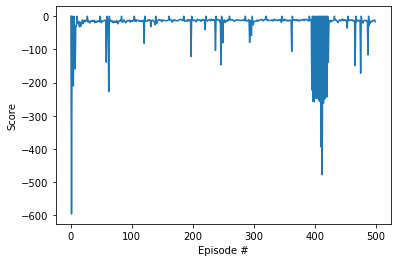

Text(0, 0.5, 'episode return')

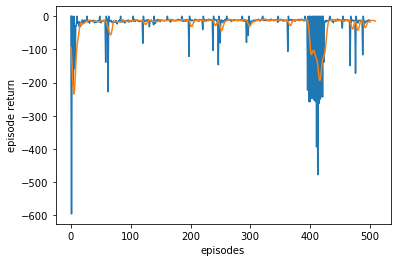

In [6]:
# Plotting the scores

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(env.scores)), env.scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Plotting 
Y = np.asarray(env.log.get_log('scores'))
Y2 = smooth(Y)
x = np.linspace(0, len(Y), len(Y))
fig1 = plt.figure()
ax1 = plt.axes()
ax1.plot(x, Y, Y2)
plt.xlabel('episodes')
plt.ylabel('episode return')
plt.show()

In [8]:
# model = DQN.load("dqn_")
model = PPO2.load("ppo2_")

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [30]:
# Evaluating the model
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render_()

Episode 509	Average Score: -25.51obj_center :  281.97903465113876 138.52970447450616 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 87.65814237394507  | tr : 70.45217185463092  | dl : 44.205524 | dr : 30.822073
obj_center :  283.3602061066716 137.70299787337422 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 87.08518512522937  | tr : 71.31110912389505  | dl : 44.205524 | dr : 38.208652
obj_center :  288.634956739965 154.33843363702124 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 85.49911957730403  | tr : 70.73815187517935  | dl : 51.82722 | dr : 38.208652
obj_center :  290.1574954175426 154.72139429037952 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 84.9718631243249  | tr : 70.16519462646367  | dl : 52.311134 | dr : 38.208652
obj_center :  291.68180200798014 155.09202701864524 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 84.44916240752217  | tr : 69.59223737774798  | dl : 52.793217 | dr : 38.208652
obj_center :  293.20787022151194 155.45027085542188 | goal :  {'x': 388, 'y': 228, 'w': 25}
t

RuntimeError: Tried to step environment that needs reset

In [29]:
def evaluate(model, num_steps=1000):
  """
  Evaluate a RL agent
  :param model: (BaseRLModel object) the RL Agent
  :param num_steps: (int) number of timesteps to evaluate it
  :return: (float) Mean reward for the last 100 episodes
  """
  episode_rewards = [0.0]
  obs = env_test.reset()
  for i in range(num_steps):
      # _states are only useful when using LSTM policies
      action, _states = model.predict(obs)

      obs, reward, done, info = env_test.step(action)
      
      # Stats
      episode_rewards[-1] += reward
      if done:
          obs = env_test.reset()
          episode_rewards.append(0.0)
  # Compute mean reward for the last 100 episodes
  mean_100ep_reward = round(np.mean(episode_rewards[-100:]), 1)
  print("Mean reward:", mean_100ep_reward, "Num episodes:", len(episode_rewards))
  
  return mean_100ep_reward

In [9]:
obs = env_test.reset()
for i in range(10):
  # _states are only useful when using LSTM policies
  action, _states = model.predict(obs)

  obs, reward, done, info = env_test.step(action)

In [10]:
# Random Agent, before training
mean_reward_before_train = evaluate(model, num_steps=1000)

NameError: name 'evaluate' is not defined

In [10]:
model = DQN.load("dqn_")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [7]:
from stable_baselines import results_plotter

# Helper from the library
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "Friction Finger Env")

LoadMonitorResultsError: no monitor files of the form *monitor.csv found in /tmp/gym/

In [ ]:
for i in range(5):
    print(env.step(np.random.randint(0,5,1)[0]))